### 데이터 살펴보기

In [1]:
import pandas as pd
danawa_data = pd.read_excel('crawling_data/6_2_danawa_data_final.xlsx')
print(danawa_data.shape)
danawa_data.head()

(318, 6)


,카테고리,회사명,상품명,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1010320.0,120.0,200.0
1,핸디/스틱청소기,다이슨,V8 플러피,405230.0,40.0,155.0
2,핸디/스틱청소기,샤오미,드리미 V10,162980.0,60.0,220.0
3,핸디/스틱청소기,일렉트로룩스,ZB3302AK,124380.0,42.0,NaN
4,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000.0,65.0,220.0


#### 데이터 정렬

In [2]:
top_list = danawa_data.sort_values(by='흡입력', ascending = False)
top_list.head()

,카테고리,회사명,상품명,가격,사용시간,흡입력
12,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,166240.0,60.0,260.0
292,핸디/스틱청소기,툴앤툴,T300,248380.0,35.0,260.0
30,핸디/스틱청소기,샤오미,SHUNZAO Z11,154990.0,60.0,260.0
141,핸디/스틱청소기,DIBEA,F20 맥스,209000.0,50.0,250.0
52,핸디/스틱청소기,샤오미,드리미 V11,309610.0,90.0,250.0


In [3]:
top_list = danawa_data.sort_values(by='사용시간', ascending = False)
top_list.head()

,카테고리,회사명,상품명,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1010320.0,120.0,200.0
62,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,874280.0,120.0,200.0
40,핸디/스틱청소기,삼성전자,제트 VS20T9278S7,1016860.0,120.0,200.0
211,핸디/스틱청소기,샤오미,이지에 YE-01,28500.0,120.0,NaN
25,핸디/스틱청소기,LG전자,코드제로 A9S A9400,788050.0,120.0,200.0


In [4]:
# 여러 기준(흡입력/사용시간)으로 정렬

## 앞에 사용시간을 뒀으므로 사용시간을 기준으로 정렬, 사용시간이 같다면 흡입력을 기준으로 정렬
top_list = danawa_data.sort_values(by=['사용시간', '흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,상품명,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1010320.0,120.0,200.0
6,핸디/스틱청소기,LG전자,코드제로 A9S A9570,952820.0,120.0,200.0
8,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,945870.0,120.0,200.0
9,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,742520.0,120.0,200.0
13,핸디/스틱청소기,LG전자,코드제로 A9S A9470,901000.0,120.0,200.0


### 가성비 좋은 제품 살펴보기

In [8]:
price_mean_value = danawa_data['가격'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
suction_mean_value = danawa_data['흡입력'].mean()

print('가격 평균 : ',round(price_mean_value,2))
print('사용시간 평균 : ',round(use_time_mean_value,2))
print('흡입력 평균 : ',round(suction_mean_value,2))

가격 평균 :  333905.04
사용시간 평균 :  46.84
흡입력 평균 :  156.81


In [12]:
# 모든조건이 평균보다 좋은 제품 탐색
condition_data = danawa_data[(danawa_data['가격'] <= price_mean_value)&
                             (danawa_data['사용시간'] >= use_time_mean_value)&
                             (danawa_data['흡입력'] >= suction_mean_value)]
condition_data.head()

,카테고리,회사명,상품명,가격,사용시간,흡입력
2,핸디/스틱청소기,샤오미,드리미 V10,162980.0,60.0,220.0
4,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000.0,65.0,220.0
5,핸디/스틱청소기,델로라,V11 파워 300W,129000.0,70.0,220.0
12,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,166240.0,60.0,260.0
30,핸디/스틱청소기,샤오미,SHUNZAO Z11,154990.0,60.0,260.0


### 데이터 시각화

In [24]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

# 그래프에서 한글 표기를 위한 글꼴 변경
if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/Malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else :
    print('Check your OS system')

In [25]:
# 결측값 제거
chart_data = danawa_data.dropna(axis=0)
len(chart_data)

172

In [21]:
# 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

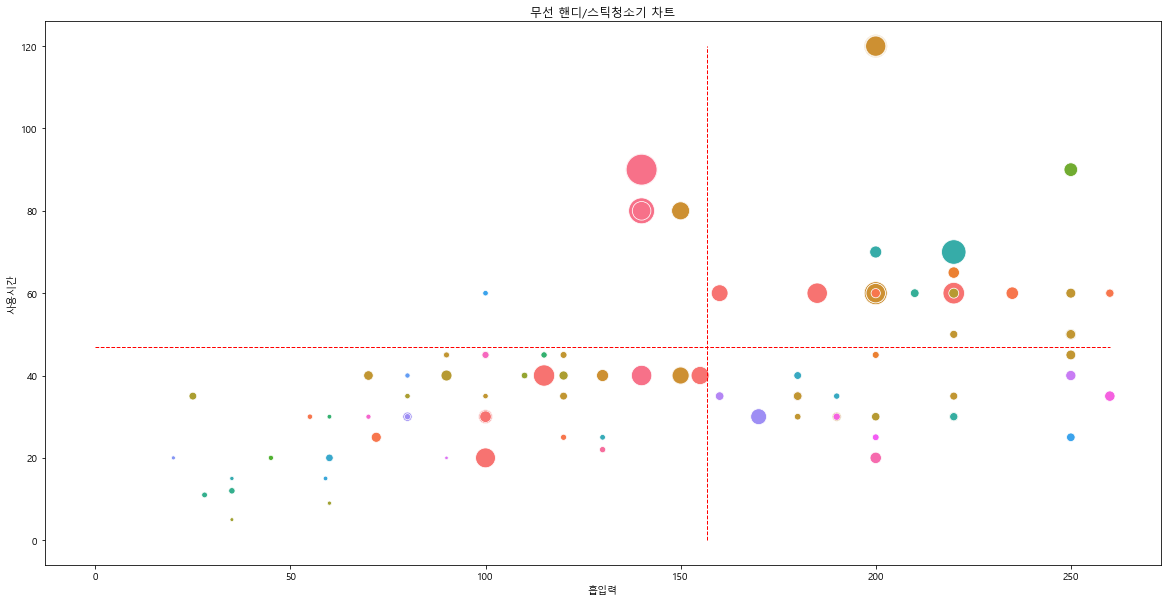

In [23]:
# 청소기성능 시각화
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(data = chart_data, x='흡입력', y='사용시간', size='가격', hue='회사명',
                sizes = (10, 1000), legend=False)

plt.plot([0,suction_max_value],
         [use_time_mean_value, use_time_mean_value],
         'r--',
         lw = 1)

plt.plot([suction_mean_value,suction_mean_value],
         [0, use_time_max_value],
         'r--',
         lw = 1)

#### 인기제품 데이터 시각화

In [26]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

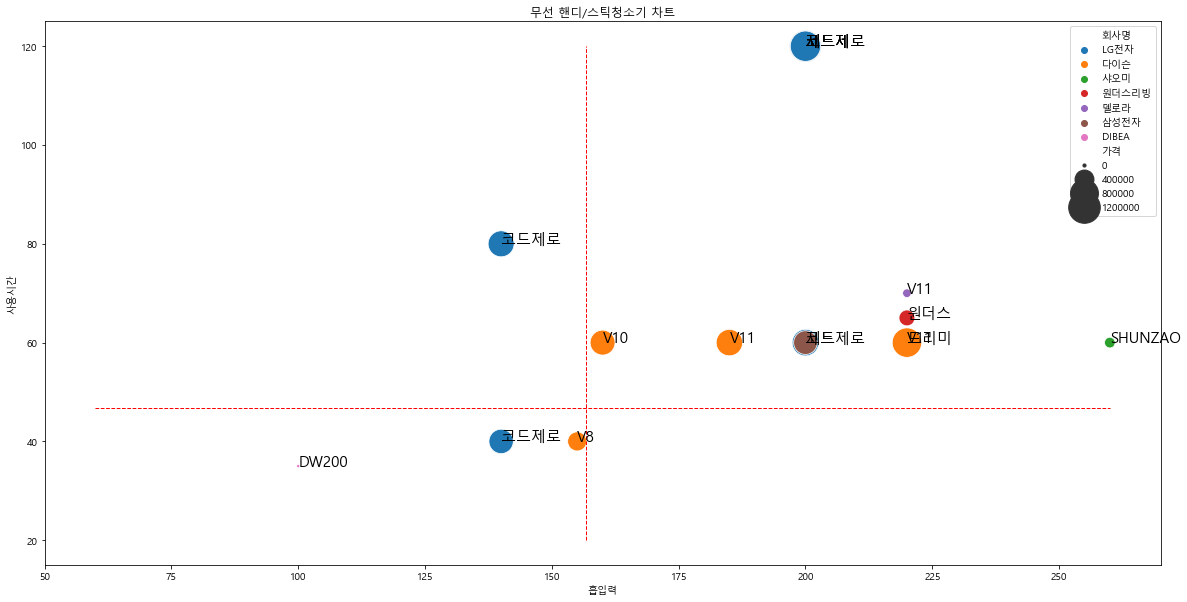

In [37]:
# 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max_value = chart_data_selected['흡입력'].max()
suction_min_value = chart_data_selected['흡입력'].min()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_min_value = chart_data_selected['사용시간'].min()

# 청소기성능 시각화
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(data = chart_data_selected, x='흡입력', y='사용시간', size='가격', hue='회사명',
                sizes = (10, 1000))

plt.plot([60, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
         'r--',
         lw = 1)

plt.plot([suction_mean_value, suction_mean_value],
         [20, use_time_max_value],
         'r--',
         lw = 1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['상품명'].split(' ')[0]
    plt.text(x,y,s,size=15)

plt.show()